In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

print("Dataset Loaded Successfully")
data.head()


Dataset Loaded Successfully


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.tail()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
data.info() 
# dataset information It gives a summary of the dataset.

# Think of it as:

# “Tell me everything important about this table in one shot
# data.info() provides a summary of the dataset including columns, data types, and missing values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
data.isnull().sum()
# It checks whether any data is missing in each column.

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [10]:
X = data.iloc[:, :-1]   # Features
y = data.iloc[:, -1]    # Target

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Inputs are the feature values, and output is the target label to be predicted.
# We are separating the inputs and the output.

# X → input data (features)

# y → output data (target / answer)

Features shape: (150, 4)
Target shape: (150,)


In [11]:

# Create a StandardScaler object to normalize the feature values
scaler = StandardScaler()

# Fit the scaler on the input data and transform it so that
# each feature has mean 0 and standard deviation 1
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back into a DataFrame
# and retain the original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first five rows of the scaled dataset
X_scaled_df.head()
# StandardScaler normalizes the data so that each feature contributes equally.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (120, 4)
Testing data shape: (30, 4)


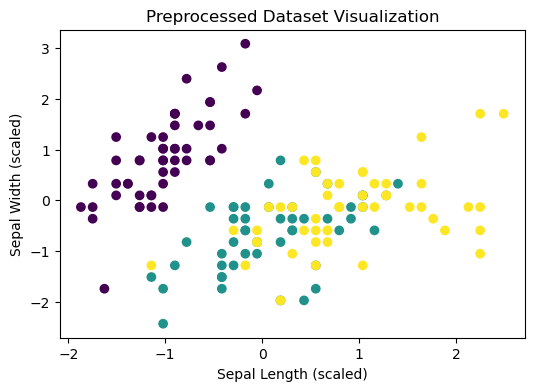

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 1], c=y)
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("Preprocessed Dataset Visualization")
plt.show()



# 2. Green and yellow dots overlap

# They mix in the middle

# Harder to separate

# Means:

# Class 1 and 2 are more similar

# X_scaled_df.iloc[:, 0]

#  Means:

# “Give me ALL values from the first column”

# This first column is:

# Sepal length (scaled)

# These values go on the X-axis (left–right).

# ⃣ X_scaled_df.iloc[:, 1]

#  Means:

# “Give me ALL values from the second column”

# This second column is:

# Sepal width (scaled)

# These values go on the Y-axis (up–down).

# ️ c = y

#  Means:

# “Color each dot based on its target value”
